# first step : data exploration and cleaning

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
# opening the file and inspecting it 
with open('ads_export.json', encoding='utf-8') as f:
        data = json.load(f)
df = pd.DataFrame(data)

print("First 5 rows:\n", df.head())
df.info()


First 5 rows:
                         _id                                  title  \
0  67a323c1825c93ea5571d9df      Vente Appartement F4 Alger Saoula   
1  67a323c1825c93ea5571d9e0  Vente Appartement F3 Alger Ain naadja   
2  67a323c1825c93ea5571d9e1   Vente Appartement F3 Alger Birkhadem   
3  67a323c1825c93ea5571d9e2   Vente Appartement F4 Alger Birkhadem   
4  67a323c1825c93ea5571d9e3  Vente Appartement F3 Alger Ain benian   

                                                 url  \
0  https://www.ouedkniss.com/appartement-vente-f4...   
1  https://www.ouedkniss.com/appartement-vente-f3...   
2  https://www.ouedkniss.com/appartement-vente-f3...   
3  https://www.ouedkniss.com/appartement-vente-f4...   
4  https://www.ouedkniss.com/appartement-vente-f3...   

                       date              created    month  \
0  2025-02-05T08:37:57.000Z  2025-02-05T08:37:57  2025-02   
1  2025-02-05T08:37:57.000Z  2025-02-05T08:37:57  2025-02   
2  2025-02-05T08:37:56.000Z  2025-02-05T08:3

### dropping the rows where the important columns are missing

In [3]:
df = df.dropna(subset=['price', 'price_v', 'norm_price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179043 entries, 0 to 223480
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   _id          179043 non-null  object 
 1   title        179043 non-null  object 
 2   url          179043 non-null  object 
 3   date         179043 non-null  object 
 4   created      179043 non-null  object 
 5   month        179043 non-null  object 
 6   description  168075 non-null  object 
 7   town         179043 non-null  object 
 8   departement  179043 non-null  object 
 9   store        179043 non-null  object 
 10  category     179043 non-null  object 
 11  surface      179043 non-null  int64  
 12  price_v      179043 non-null  float64
 13  price        179043 non-null  float64
 14  norm_price   179043 non-null  float64
 15  average      179043 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 23.2+ MB


In [4]:
#since description still has some rows where it's missing , we fill it just in case
df['description'] = df['description'].fillna('No description')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179043 entries, 0 to 223480
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   _id          179043 non-null  object 
 1   title        179043 non-null  object 
 2   url          179043 non-null  object 
 3   date         179043 non-null  object 
 4   created      179043 non-null  object 
 5   month        179043 non-null  object 
 6   description  179043 non-null  object 
 7   town         179043 non-null  object 
 8   departement  179043 non-null  object 
 9   store        179043 non-null  object 
 10  category     179043 non-null  object 
 11  surface      179043 non-null  int64  
 12  price_v      179043 non-null  float64
 13  price        179043 non-null  float64
 14  norm_price   179043 non-null  float64
 15  average      179043 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 23.2+ MB


### filtering the rows where category is 'immobilier'

In [5]:
df = df[df['category'].str.startswith('immobilier-vente')]

print("\nUnique categories after filtering:\n", df['category'].unique())
df.info()


Unique categories after filtering:
 ['immobilier-vente-appartement' 'immobilier-vente'
 'immobilier-vente-villa' 'immobilier-vente-terrain']
<class 'pandas.core.frame.DataFrame'>
Index: 46087 entries, 0 to 212251
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id          46087 non-null  object 
 1   title        46087 non-null  object 
 2   url          46087 non-null  object 
 3   date         46087 non-null  object 
 4   created      46087 non-null  object 
 5   month        46087 non-null  object 
 6   description  46087 non-null  object 
 7   town         46087 non-null  object 
 8   departement  46087 non-null  object 
 9   store        46087 non-null  object 
 10  category     46087 non-null  object 
 11  surface      46087 non-null  int64  
 12  price_v      46087 non-null  float64
 13  price        46087 non-null  float64
 14  norm_price   46087 non-null  float64
 15  average      46087 non-null  float

### extracting each category type ( villa , terrain , appatement F1 , F2.....)

In [6]:
import re

def extract_property_type(row):
    if row['category'] == 'immobilier-vente-villa':
        return 'Villa'
    elif row['category'] == 'immobilier-vente-terrain':
        return 'Terrain'
    elif row['category'] in ['immobilier-vente-appartement', 'immobilier-vente']:
        # recherche de F1 a F8
        match = re.search(r'\b[Ff](0?[1-8])\b', row['title'])
        if match:
            return f'F{match.group(1).lstrip("0")}'
        else:
            # Default if none found
            return 'Apartment'
    return 'Unknown'

df['property_type'] = df.apply(extract_property_type, axis=1)

print("First 5 rows with property_type:\n", df[['title', 'category', 'property_type']].head())
print("\nUnique property types:\n", df['property_type'].unique())
df.info()

First 5 rows with property_type:
                                    title                      category  \
0      Vente Appartement F4 Alger Saoula  immobilier-vente-appartement   
1  Vente Appartement F3 Alger Ain naadja  immobilier-vente-appartement   
2   Vente Appartement F3 Alger Birkhadem  immobilier-vente-appartement   
3   Vente Appartement F4 Alger Birkhadem  immobilier-vente-appartement   
4  Vente Appartement F3 Alger Ain benian  immobilier-vente-appartement   

  property_type  
0            F4  
1            F3  
2            F3  
3            F4  
4            F3  

Unique property types:
 ['F4' 'F3' 'F2' 'F5' 'F1' 'Apartment' 'F6' 'F7' 'F8' 'Villa' 'Terrain']
<class 'pandas.core.frame.DataFrame'>
Index: 46087 entries, 0 to 212251
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            46087 non-null  object 
 1   title          46087 non-null  object 
 2   url            46087 non-null 

### dealing the the apartement type

inspecting the rows that have the type apartement

In [7]:
df_filtered = df[df['property_type'].isin(['Apartment'])]

print("Rows with property_type 'Apartment':\n")
print("First 5 rows:\n", df_filtered[['title', 'category', 'description', 'property_type']].head())
print("\nUnique property types in filtered data:\n", df_filtered['property_type'].unique())
print("\nNumber of rows in filtered data:", len(df_filtered))
df_filtered.info()

Rows with property_type 'Apartment':

First 5 rows:
                                        title                      category  \
137            Vente Appartement Alger Kouba  immobilier-vente-appartement   
140      Vente Appartement Alger Bab ezzouar  immobilier-vente-appartement   
221  Vente Appartement Alger Bordj el kiffan  immobilier-vente-appartement   
458   Vente Appartement Alger Bordj el bahri  immobilier-vente-appartement   
498        Vente Appartement Alger Birkhadem  immobilier-vente-appartement   

                                           description property_type  
137  Agence "Le Mètre Carré" vend à Kouba, dans une...     Apartment  
140  Description\n🇩🇿AGENCE IMMOBILIÈRE I.M.A🇩🇿 prop...     Apartment  
221  ✅ترقية عقارية le roi immo تقترح عليكم شقة f3 ف...     Apartment  
458  Je mets en vente un appartement à Bordj El Bah...     Apartment  
498  Agence Vend F3 à Birkhadem cité 804 logts zonk...     Apartment  

Unique property types in filtered data:
 ['Apartmen

1483 is a lot of rows , so i tried to extract the type from the description

In [8]:
def update_property_type(row):
    if row['property_type'] == 'Apartment':
        if isinstance(row['description'], str):
            match = re.search(r'\b[Ff](0?[1-8])\b', row['description'])
            if match:
                return f'F{match.group(1).lstrip("0")}'
        # if not found we keep it as apartment
        return 'Apartment'
    return row['property_type']

df['property_type'] = df.apply(update_property_type, axis=1)

print("Updated dataset with property_type from description:\n")
print("First 5 rows:\n", df[['title', 'category', 'description', 'property_type']].head())
print("\nUnique property types after update:\n", df['property_type'].unique())
print("\nNumber of 'Apartment' rows remaining:", len(df[df['property_type'] == 'Apartment']))
df.info()

Updated dataset with property_type from description:

First 5 rows:
                                    title                      category  \
0      Vente Appartement F4 Alger Saoula  immobilier-vente-appartement   
1  Vente Appartement F3 Alger Ain naadja  immobilier-vente-appartement   
2   Vente Appartement F3 Alger Birkhadem  immobilier-vente-appartement   
3   Vente Appartement F4 Alger Birkhadem  immobilier-vente-appartement   
4  Vente Appartement F3 Alger Ain benian  immobilier-vente-appartement   

                                         description property_type  
0  Vente appartement F4 de 110m2 au 3me étage san...            F4  
1  Vente appartement F3 de 80m2 au Rdc idéal pour...            F3  
2  Vente appartement F3 meublé de 80m2 au 2me éta...            F3  
3  Vente Appartement F4 de 108m² - Djenane Sfari ...            F4  
4                                                               F3  

Unique property types after update:
 ['F4' 'F3' 'F2' 'F5' 'F1' 'F6' 'Ap

since theres still 518 remaining , im going to ignore them for now , until further updates where i anaylise the description more as a feature

In [9]:
apartment_rows = df[df['property_type'] == 'Apartment']
print("Sample of 'Apartment' rows (first 5):\n")
print(apartment_rows[['title', 'description', 'surface', 'price', 'property_type']].head())
print("\nSummary statistics for 'Apartment' rows:\n")
print(apartment_rows[['surface', 'price', 'average']].describe())

Sample of 'Apartment' rows (first 5):

                                        title  \
714       Vente Appartement Alger Bab ezzouar   
791           Vente Appartement Alger Cheraga   
846             Vente Appartement Alger Hydra   
1150       Vente Appartement Alger Ben aknoun   
1151  Vente Appartement Alger Bordj el kiffan   

                                            description  surface       price  \
714   فيني lux شابة بزاف بنظام التدفئة و التكييف ريز...        0  27500000.0   
791   BBM PROMOTION IMMOBILIERE \n🏘️ Résidence " Les...        0  23800000.0   
846   MTB IMMOBILIER vends des appartements dans des...      120  25000000.0   
1150  Vend appartement  superficie : 165m2\nSitué  à...      165  85000000.0   
1151  promotion immobilier sultan met en vente un ap...       73     10000.0   

     property_type  
714      Apartment  
791      Apartment  
846      Apartment  
1150     Apartment  
1151     Apartment  

Summary statistics for 'Apartment' rows:

             sur

### cleaning the data

In [10]:
valid_types = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'Villa', 'Terrain']

# identifying outliers
initial_count = len(df)
outliers = df[
    (df['surface'] <= 20) | (df['surface'] > 1000) |  
    (df['price'] < 1000000) | (df['price'] > 100000000) |  
    (df['town'] == '') | 
    (~df['property_type'].isin(valid_types)) 
]

# remove outliers
df = df[
    (df['surface'] > 20) & (df['surface'] <= 1000) &  
    (df['price'] >= 1000000) & (df['price'] <= 100000000) & 
    (df['town'] != '') & 
    (df['property_type'].isin(valid_types)) 
]

outliers[['surface', 'price', 'town', 'property_type']].to_csv('invalid_listings.csv', index=False)

print("Number of listings before cleaning:", initial_count)
print("Number of listings after cleaning:", len(df))
print("Number of invalid listings:", initial_count - len(df))
print("Sample of cleaned data:\n", df[['surface', 'price', 'town', 'property_type']].head().to_string(index=False))
print("\nMissing values:\n", df[['surface', 'price', 'town', 'property_type']].isnull().sum().to_string())
print("\nUnique property types after cleaning:\n", sorted(df['property_type'].unique()))

Number of listings before cleaning: 46087
Number of listings after cleaning: 21786
Number of invalid listings: 24301
Sample of cleaned data:
  surface      price       town property_type
     110 23000000.0     Saoula            F4
      80 12500000.0 Ain naadja            F3
      80 19000000.0  Birkhadem            F3
     108 23000000.0  Birkhadem            F4
      80 13000000.0 Ain benian            F3

Missing values:
 surface          0
price            0
town             0
property_type    0

Unique property types after cleaning:
 ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'Terrain', 'Villa']


defining the columns that we need and saving the clean data

In [11]:
key_columns = ['surface', 'price', 'town', 'property_type']

df_cleaned = df[key_columns]

df_cleaned.to_csv('cleaned_real_estate_data.csv', index=False)

print("Cleaned data saved to 'cleaned_real_estate_data.csv'")
print("Number of rows saved:", len(df_cleaned))
print("Sample of saved data:\n", df_cleaned.head().to_string(index=False))
print("\nColumns in saved data:", df_cleaned.columns.tolist())

Cleaned data saved to 'cleaned_real_estate_data.csv'
Number of rows saved: 21786
Sample of saved data:
  surface      price       town property_type
     110 23000000.0     Saoula            F4
      80 12500000.0 Ain naadja            F3
      80 19000000.0  Birkhadem            F3
     108 23000000.0  Birkhadem            F4
      80 13000000.0 Ain benian            F3

Columns in saved data: ['surface', 'price', 'town', 'property_type']


some statistics

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)

# Summary statistics for numerical columns
print("Summary statistics for surface and price:\n")
print(df_cleaned[['surface', 'price']].describe())

# Distribution of property types
print("\nDistribution of property types:\n")
print(df_cleaned['property_type'].value_counts())

# Distribution of listings by town (top 10 by average price)
print("\nTop 10 towns by average price:\n")
top_towns_by_price = df_cleaned.groupby('town')['price'].mean().sort_values(ascending=False).head(10)
print(top_towns_by_price)

# Average price by property type
print("\nAverage price by property type:\n")
print(df_cleaned.groupby('property_type')['price'].mean().sort_values())

# Correlation analysis including town
# Label encode town for correlation
df_encoded = df_cleaned.copy()
df_encoded['town_encoded'] = df_encoded['town'].astype('category').cat.codes

# Correlation matrix for surface, price, and town_encoded
print("\nCorrelation matrix (surface, price, town_encoded):\n")
print(df_encoded[['surface', 'price', 'town_encoded']].corr())

Summary statistics for surface and price:

       surface        price
count 21786.00     21786.00
mean    137.79  28119406.69
std     112.03  21974126.68
min      21.00   1000000.00
25%      76.00  13000000.00
50%     102.00  20000000.00
75%     150.00  35000000.00
max    1000.00 100000000.00

Distribution of property types:

property_type
F3         7543
F4         5578
Villa      3006
F2         2087
Terrain    1859
F5         1322
F1          173
F6          152
F7           46
F8           20
Name: count, dtype: int64

Top 10 towns by average price:

town
El mouradia       47694375.00
Ben aknoun        46297477.48
Hydra             44132513.23
Hussein dey       43291245.55
Oued smar         42391780.82
El biar           40571025.64
Dely brahim       39272318.10
Said hamdine      38780320.00
Bir mourad rais   38514396.55
Cheraga           37957705.80
Name: price, dtype: float64

Average price by property type:

property_type
F1         7475329.48
F2        10705579.40
F3        176

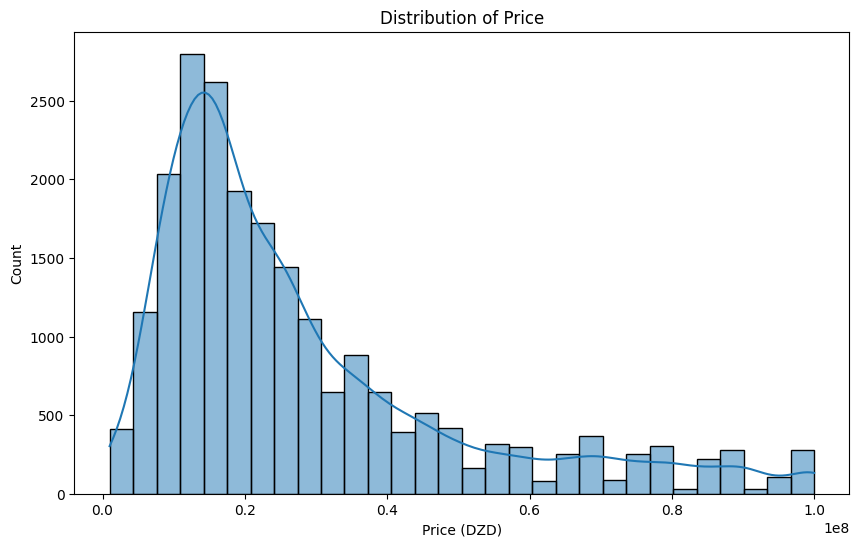

C:\Users\Dell\AppData\Local\Temp\ipykernel_96600\1163390189.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['property_type'] = pd.Categorical(df_cleaned['property_type'], categories=property_type_order, ordered=True)


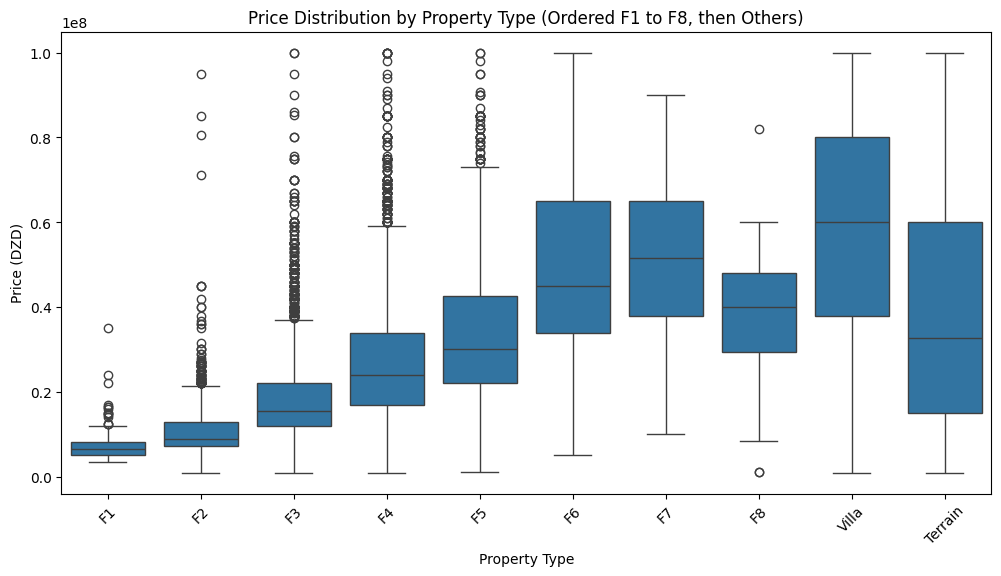

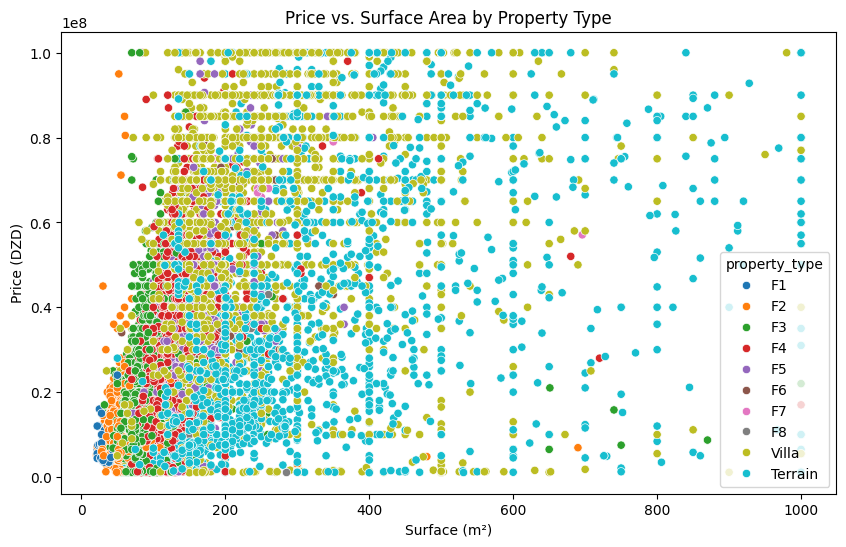

In [43]:
# Visualizations
# 1. Histogram of price
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (DZD)')
plt.ylabel('Count')
plt.show()

# 2. Boxplot of price by property type
property_type_order = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'Villa', 'Terrain']
df_cleaned['property_type'] = pd.Categorical(df_cleaned['property_type'], categories=property_type_order, ordered=True)
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='price', data=df_cleaned, order=property_type_order)
plt.title('Price Distribution by Property Type (Ordered F1 to F8, then Others)')
plt.xlabel('Property Type')
plt.ylabel('Price (DZD)')
plt.xticks(rotation=45)
plt.show()

# 3. Scatter plot of price vs. surface
plt.figure(figsize=(10, 6))
sns.scatterplot(x='surface', y='price', hue='property_type', data=df_cleaned)
plt.title('Price vs. Surface Area by Property Type')
plt.xlabel('Surface (m²)')
plt.ylabel('Price (DZD)')
plt.show()


encoding and saving the data

In [14]:
df_encoded = pd.get_dummies(df_cleaned, columns=['property_type', 'town'], prefix=['type', 'town'])
df_encoded['price'] = np.log1p(df_encoded['price'])
df_encoded['surface'] = np.log1p(df_encoded['surface'])

df_encoded.to_csv('encoded_real_estate_data.csv', index=False)
print("Encoded data saved to 'encoded_real_estate_data.csv'")

Encoded data saved to 'encoded_real_estate_data.csv'


# second step : data preprocessing

i scaled the data to avoid having large ranges , so that all features on a similar range

and i removed the outliner (that we saw in the box plot)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# removing outliers from training data
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
mask = (y_train >= Q1 - 1.5 * IQR) & (y_train <= Q3 + 1.5 * IQR)
X_train_filtered = X_train_s[mask]
y_train_filtered = y_train[mask]

# filtering test set outliers
mask_test = (y_test >= Q1 - 1.5 * IQR) & (y_test <= Q3 + 1.5 * IQR)
X_test_filtered = X_test_s[mask_test]
y_test_filtered = y_test[mask_test]

print(f"Original training samples: {len(X_train)}")
print(f"Filtered training samples: {len(X_train_filtered)}")
print(f"Original test samples: {len(X_test)}")
print(f"Filtered test samples: {len(X_test_filtered)}")

Original training samples: 17428
Filtered training samples: 17160
Original test samples: 4358
Filtered test samples: 4285


# third step : models trainings and testings

## explaining the metrics:

1- R² (Coefficient of Determination) :

mesures the proportion of variance in the target variable

it ranges from 0 to 1 , higher values indicating better fit

ideal : R² ≥ 0.8 (80% of variance explained)

2- MAE (Mean Absolute Error):

the average absolute difference between predicted and actual values

lower MAE indicates better predictive accuracy

ideal : MAE < 0.2

3- MSE (Mean Squared Error):

the average of squared differences between predicted and actual values

lower MSE indicates better accuracy, with a stronger penalty for large errors compared to MAE

ideal : MSE < 0.1

### staring with linear regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()

model.fit(X_train_filtered, y_train_filtered)

y_pred_train = model.predict(X_train_filtered)
y_pred_test_filtered = model.predict(X_test_filtered)

# Evaluate model
print("\nLinear Regression Results:")
print(f"Train R²: {model.score(X_train_filtered, y_train_filtered):.4f}")
print(f"Test R²: {model.score(X_test_filtered, y_test_filtered):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train_filtered, y_pred_train):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test_filtered, y_pred_test_filtered):.4f}")
print(f"Train MSE: {mean_squared_error(y_train_filtered, y_pred_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test_filtered, y_pred_test_filtered):.4f}")


Linear Regression Results:
Train R²: 0.7271
Test R²: 0.7675
Train MAE: 0.2517
Test MAE: 0.2463
Train MSE: 0.1353
Test MSE: 0.1183


Linear Regression performs decently

the R² score shows that it struggles with capturing complex patterns

### next is random forest regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, min_samples_split=20, min_samples_leaf=2, max_features='log2', max_depth=35, random_state=42)

model.fit(X_train_filtered, y_train_filtered)

y_pred_train = model.predict(X_train_filtered)
y_pred_test_filtered = model.predict(X_test_filtered)

print("\nRandom Forest Results:")
print(f"Train R²: {model.score(X_train_filtered, y_train_filtered):.4f}")
print(f"Test R²: {model.score(X_test_filtered, y_test_filtered):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train_filtered, y_pred_train):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test_filtered, y_pred_test_filtered):.4f}")
print(f"Train MSE: {mean_squared_error(y_train_filtered, y_pred_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test_filtered, y_pred_test_filtered):.4f}")


Random Forest Results:
Train R²: 0.7942
Test R²: 0.7919
Train MAE: 0.2211
Test MAE: 0.2341
Train MSE: 0.1020
Test MSE: 0.1059


random forest outperforms linear regression across all metrics with higher R² and lower errors

the slight train-test gap suggests minor overfitting, but overall it’s a strong model

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=5, random_state=42)

model.fit(X_train_filtered, y_train_filtered)

y_pred_train = model.predict(X_train_filtered)
y_pred_test_filtered = model.predict(X_test_filtered)

print("\nGradientBoostingRegressor Results:")
print(f"Train R²: {model.score(X_train_filtered, y_train_filtered):.4f}")
print(f"Test R²: {model.score(X_test_filtered, y_test_filtered):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train_filtered, y_pred_train):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test_filtered, y_pred_test_filtered):.4f}")
print(f"Train MSE: {mean_squared_error(y_train_filtered, y_pred_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test_filtered, y_pred_test_filtered):.4f}")


GradientBoostingRegressor Results:
Train R²: 0.8122
Test R²: 0.8012
Train MAE: 0.2133
Test MAE: 0.2256
Train MSE: 0.0931
Test MSE: 0.1012


GradientBoostingRegressor is the top performer with the highest R² and lowest errors across all metrics

the small train-test gaps balances fit and generalization.

In [39]:
import joblib

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=5, random_state=42)
model.fit(X_train_filtered, y_train_filtered)

joblib.dump(model, 'immo_price_prediction_model.pkl')
print("Model saved to 'immo_price_prediction_model.pkl'")

joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved to 'scaler.pkl'")

Model saved to 'immo_price_prediction_model.pkl'
Scaler saved to 'scaler.pkl'


Model loaded successfully

Top 10 Features by Importance:
                 Feature  Importance
0                surface        0.69
9             type_Villa        0.07
28  town_Bordj el kiffan        0.05
10          type_Terrain        0.02
49            town_Hydra        0.02
36           town_Douera        0.01
27   town_Bordj el bahri        0.01
66      town_Sidi moussa        0.01
57     town_Ouled chebel        0.01
62           town_Rouiba        0.01
Feature importance saved to 'feature_importance.csv'


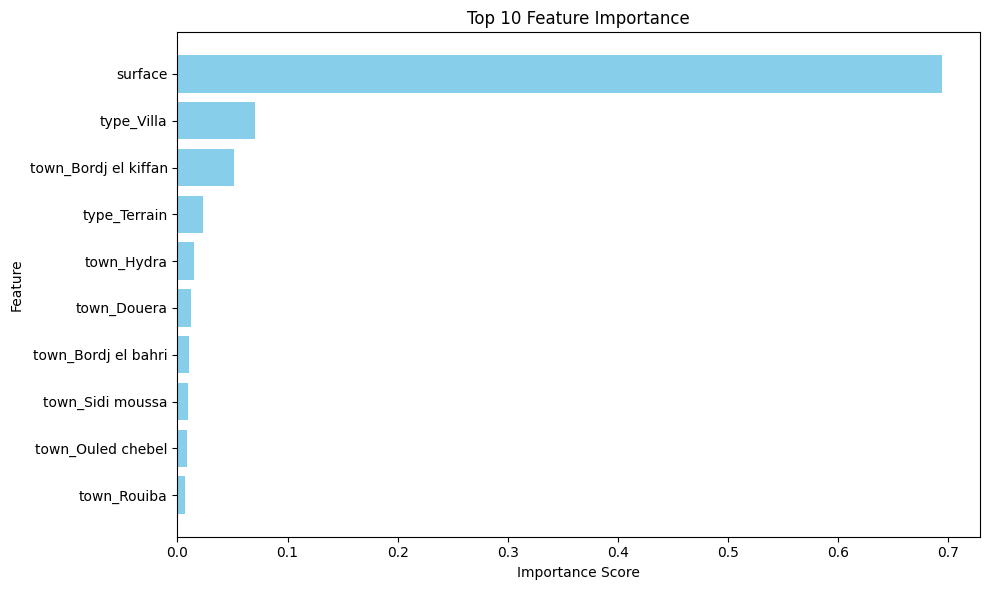

In [42]:
model = joblib.load('immo_price_prediction_model.pkl')
print("Model loaded successfully")

X_train_columns = pd.read_csv('encoded_real_estate_data.csv').drop('price', axis=1).columns

feature_importance = pd.DataFrame({
    'Feature': X_train_columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Features by Importance:")
print(feature_importance.head(10))

feature_importance.to_csv('feature_importance.csv', index=False)
print("Feature importance saved to 'feature_importance.csv'")

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10), color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis() 
plt.tight_layout()
